In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.dpi'] = 450

In [2]:
directory = '/Volumes/Data2/RST/notebook/'

In [3]:
ward_trips = pd.read_csv(directory + 'TTS OD/WARD_TYPE.csv')
ward_trips

,ward_o,ward_d,type,total
0,1,1,ab_am,0.552704
1,1,1,ab_ev,0.118363
2,1,1,ab_md,0.811149
3,1,1,ab_pm,0.973774
4,1,1,bl_am,168.513442
...,...,...,...,...
15777,25,25,rac_pm,399.066513
15778,25,25,raw_am,423.889255
15779,25,25,raw_ev,206.497937
15780,25,25,raw_md,140.284162


In [4]:
cluster = pd.read_csv('cluster.csv')

In [5]:
cluster

,ward,cc,neighbor_avg,transfer_avg,mean_random,cc_normalized,ward_name,period
0,1,0.000062,0.080221,0.018078,0.026996,0.002291,Etobicoke North,EM
1,2,0.001553,0.073643,0.012987,0.033466,0.046420,Etobicoke Centre,EM
2,3,0.000782,0.123061,0.016829,0.031901,0.024501,Etobicoke-Lakeshore,EM
3,4,0.001906,0.156527,0.044794,0.068371,0.027871,Parkdale-High Park,EM
4,5,0.000914,0.099830,0.021599,0.035918,0.025439,York South-Weston,EM
...,...,...,...,...,...,...,...,...
120,21,0.006500,0.456060,0.163659,0.022407,0.290090,Scarborough Centre,EV
121,22,0.008930,0.473257,0.184480,0.034787,0.256704,Scarborough-Agincourt,EV
122,23,0.004497,0.406297,0.159880,0.026614,0.168988,Scarborough North,EV
123,24,0.009587,0.540616,0.175776,0.035690,0.268618,Scarborough-Guildwood,EV


In [6]:
ward_trips['group'] = ward_trips['type'].str.split('_', expand = True)[0]
ward_trips['period'] = ward_trips['type'].str.split('_', expand = True)[1].str.upper()


In [7]:
ward_trip_total = ward_trips.groupby(['group', 'period']).sum()[['total']].reset_index()

In [11]:
origin_nn = ward_trips.merge(cluster[['ward', 'neighbor_avg', 'period']], left_on = ['ward_o', 'period'], right_on = ['ward', 'period'])
origin_nn['weighted_nn'] = origin_nn['neighbor_avg'] * origin_nn['total']  
origin_nn = origin_nn.groupby(['group', 'period']).sum()[['weighted_nn']].reset_index().sort_values(
    by = ['period', 'weighted_nn'], ascending =  False)

In [12]:
origin_nn = origin_nn.merge(ward_trip_total)
origin_nn['avg_nn'] = origin_nn['weighted_nn']/origin_nn['total']
origin_nn.sort_values(by = ['period', 'avg_nn'], ascending =  False)

,group,period,weighted_nn,total,avg_nn
7,ab,PM,287.426442,365.565840,0.786251
0,raw,PM,159732.138692,204036.850191,0.782859
5,imm,PM,11271.991615,14543.038559,0.775078
1,rac,PM,76107.559731,98678.217618,0.771270
6,lep,PM,6872.391966,8962.136141,0.766825
2,c0,PM,54081.785832,71456.318609,0.756851
4,bl,PM,12027.327356,15936.260026,0.754715
3,lico,PM,37077.465331,51047.772549,0.726329
15,ab,MD,58.632436,107.510485,0.545365
9,c0,MD,16204.918798,29899.220918,0.541985


In [13]:
dest_nn = ward_trips.merge(cluster[['ward', 'neighbor_avg', 'period']], left_on = ['ward_d', 'period'], right_on = ['ward', 'period'])
dest_nn['weighted_nn'] = dest_nn['neighbor_avg'] * dest_nn['total']  
dest_nn = dest_nn.groupby(['group', 'period']).sum()[['weighted_nn']].reset_index().sort_values(
    by = ['period', 'weighted_nn'], ascending =  False)

dest_nn = dest_nn.merge(ward_trip_total)
dest_nn['avg_nn'] = dest_nn['weighted_nn']/dest_nn['total']
dest_nn.sort_values(by = ['period', 'avg_nn'], ascending =  False)

,group,period,weighted_nn,total,avg_nn
2,c0,PM,51138.048314,71456.318609,0.715655
7,ab,PM,254.468267,365.565840,0.696094
0,raw,PM,137251.183886,204036.850191,0.672678
5,imm,PM,9654.468631,14543.038559,0.663855
1,rac,PM,65360.889729,98678.217618,0.662364
6,lep,PM,5882.998061,8962.136141,0.656428
4,bl,PM,10407.715476,15936.260026,0.653084
3,lico,PM,33165.175949,51047.772549,0.649689
15,ab,MD,60.597322,107.510485,0.563641
8,raw,MD,34625.749866,62582.308176,0.553283


In [14]:
od_nn = ward_trips.merge(cluster[['ward', 'neighbor_avg', 'period']], left_on = ['ward_o', 'period'], right_on = ['ward', 'period'])
od_nn = od_nn.merge(cluster[['ward', 'neighbor_avg', 'period']], left_on = ['ward_d', 'period'], right_on = ['ward', 'period'])
od_nn['od_nn'] = (od_nn['neighbor_avg_x'] + od_nn['neighbor_avg_y'])/2

In [15]:
od_nn['weighted_nn'] = od_nn['od_nn'] * od_nn['total']  
od_nn = od_nn.groupby(['group', 'period']).sum()[['weighted_nn']].reset_index().sort_values(
    by = ['period', 'weighted_nn'], ascending =  False)

od_nn = od_nn.merge(ward_trip_total)
od_nn['avg_nn'] = od_nn['weighted_nn']/od_nn['total']
od_nn.sort_values(by = ['period', 'avg_nn'], ascending =  False)

,group,period,weighted_nn,total,avg_nn
7,ab,PM,270.947354,365.565840,0.741173
2,c0,PM,52609.917073,71456.318609,0.736253
0,raw,PM,148491.661289,204036.850191,0.727769
5,imm,PM,10463.230123,14543.038559,0.719467
1,rac,PM,70734.224730,98678.217618,0.716817
6,lep,PM,6377.695014,8962.136141,0.711627
4,bl,PM,11217.521416,15936.260026,0.703899
3,lico,PM,35121.320640,51047.772549,0.688009
15,ab,MD,59.614879,107.510485,0.554503
9,c0,MD,16257.651287,29899.220918,0.543748


In [16]:
od_nn = od_nn.sort_values(by = ['period', 'group'], ascending =  False)

In [17]:
group_df = pd.DataFrame.from_records([['Racialized', 'rac'],
 ['Black', 'bl'],
[ 'Recent\nImmigrants', 'imm'],
 ['Low\nIncome', 'lico'],
[ 'Carless\nHouseholds', 'c0'],
[ 'LEP', 'lep'],
[ 'General\nPopulation', 'raw']], columns = ['Group String', 'group'])

In [18]:
origin_nn = origin_nn.merge(group_df)
dest_nn = dest_nn.merge(group_df)
od_nn = od_nn.merge(group_df)


In [19]:
od_nn_pivot = od_nn.pivot('period', 'Group String', 'avg_nn').reindex(['EM','AM','MD','PM','EV'],axis = 0)
od_nn_pivot = od_nn_pivot.reindex(['Black', 'Low\nIncome', 'LEP', 'General\nPopulation',
                                    'Carless\nHouseholds', 'Racialized', 'Recent\nImmigrants'],axis = 1)

In [20]:
od_nn_pivot

Group String,Black,Low\nIncome,LEP,General\nPopulation,Carless\nHouseholds,Racialized,Recent\nImmigrants
period,,,,,,,
EM,0.144827,0.160551,0.160513,0.157346,0.157457,0.154000,0.157145
AM,0.753901,0.737622,0.771392,0.779766,0.790413,0.771615,0.774294
MD,0.522881,0.520033,0.529509,0.543259,0.543748,0.526342,0.530422
PM,0.703899,0.688009,0.711627,0.727769,0.736253,0.716817,0.719467
EV,0.474313,0.471108,0.483338,0.491057,0.494047,0.481365,0.483258


In [21]:
od_nn_pivot_n = od_nn_pivot.div(od_nn_pivot.max(axis=1), axis=0)
od_nn_pivot_n

Group String,Black,Low\nIncome,LEP,General\nPopulation,Carless\nHouseholds,Racialized,Recent\nImmigrants
period,,,,,,,
EM,0.902062,1.000000,0.999768,0.980038,0.980732,0.959200,0.978787
AM,0.953806,0.933211,0.975935,0.986530,1.000000,0.976217,0.979607
MD,0.961624,0.956386,0.973812,0.999100,1.000000,0.967988,0.975492
PM,0.956056,0.934474,0.966552,0.988477,1.000000,0.973602,0.977200
EV,0.960056,0.953568,0.978323,0.993948,1.000000,0.974329,0.978161


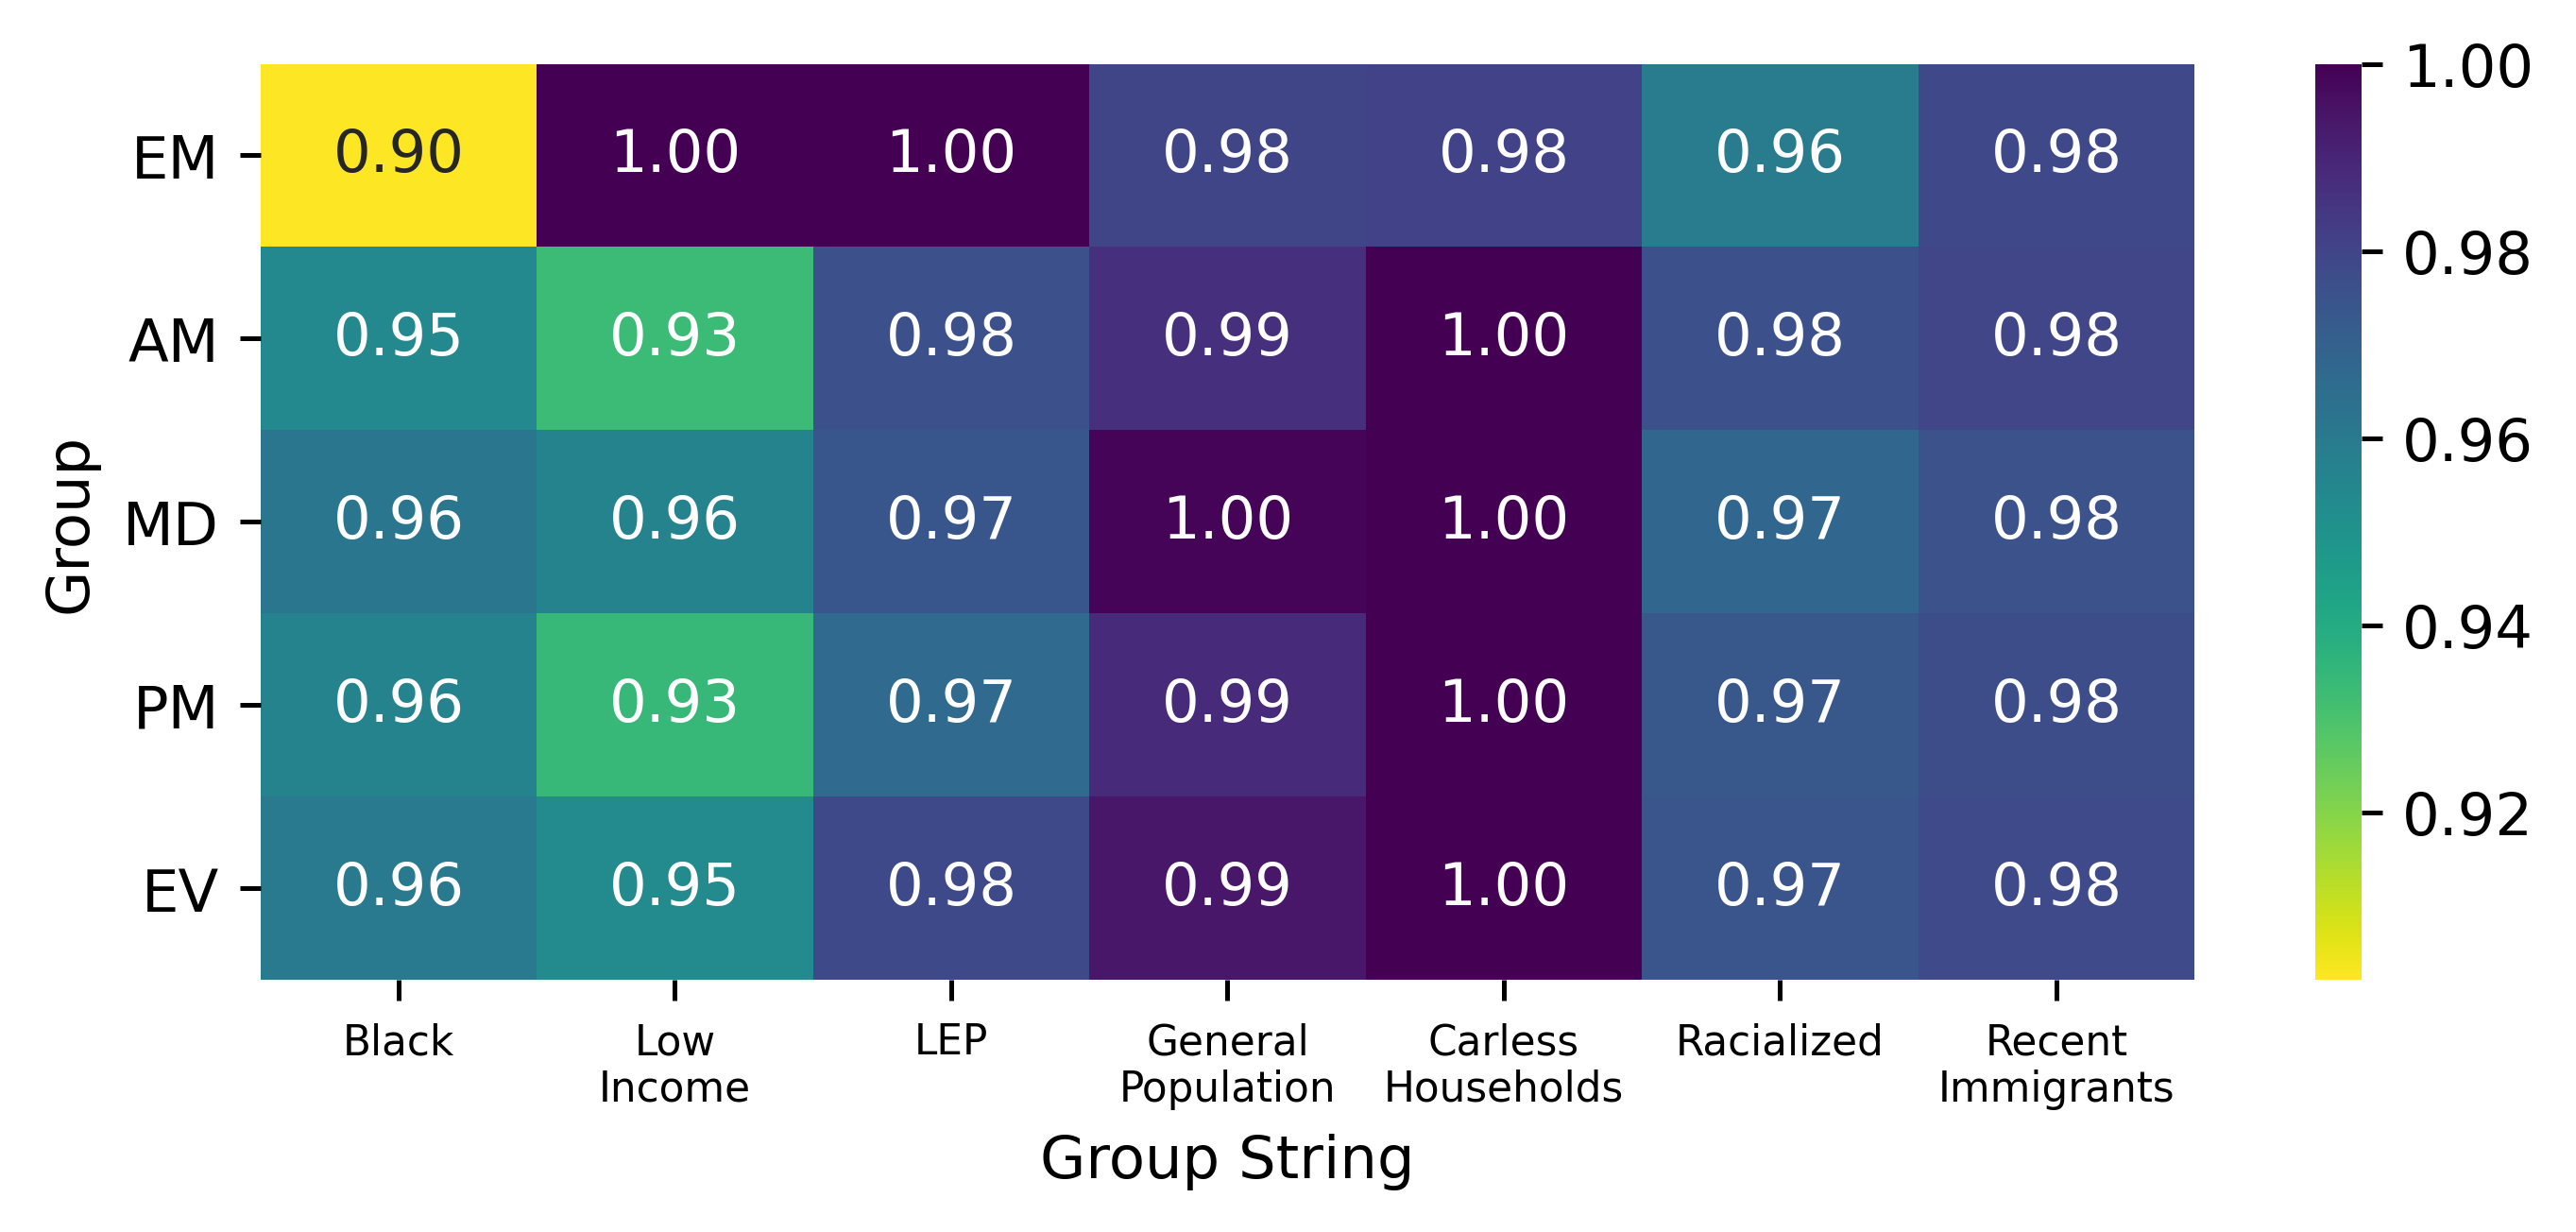

In [22]:
import seaborn as sns

fig, ax = plt.subplots()

fig.set_size_inches([6.5,3])

sns.heatmap(od_nn_pivot_n, ax = ax, cmap = 'viridis_r', annot=True, fmt = '.2f', 
                vmin = od_nn_pivot_n.min().min(), vmax = 1)

ax.tick_params(axis='y', rotation=0)
ax.tick_params(axis='x', rotation=0)

ax.set_ylabel('Period')
ax.set_ylabel('Group')
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 7)
plt.tight_layout()
plt.savefig('nearest_neighbour.png', dpi = 300)